In [288]:
# Dependencies and setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Load and read data files
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
df_mouse = pd.read_csv(mouse_drug_data_to_load)
df_trial = pd.read_csv(clinical_trial_data_to_load)

# Limit data to only these treatments: Capomulin, Infubinol, Ketapril, and Placebo
df_mouse = df_mouse.drop(df_mouse[(df_mouse.Drug == 'Stelasyn') | 
                                  (df_mouse.Drug == 'Naftisol')| 
                                  (df_mouse.Drug == 'Ceftamin')| 
                                  (df_mouse.Drug == 'Propriva') | 
                                  (df_mouse.Drug == 'Zoniferol')| 
                                  (df_mouse.Drug == 'Ramicane')].index)

# Combine the data into a single dataset
df = df_mouse.merge(df_trial,on='Mouse ID')

# Display the data table for preview
df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,q119,Ketapril,0,45.000000,0
1,q119,Ketapril,5,47.864440,0
2,q119,Ketapril,10,51.236606,0
3,n923,Ketapril,0,45.000000,0
4,n923,Ketapril,5,45.824881,0


## Tumor Response to Treatment

In [289]:
# Get the mean tumor volume data grouped by drug and timepoint 
drug_time_group = df.groupby(['Drug','Timepoint'])

# Convert to DataFrame
df_tumor_volume = pd.DataFrame(drug_time_group['Tumor Volume (mm3)'].mean())

# Preview DataFrame
df_tumor_volume.head()

# **** need the following? also same as the table
#mean_tum_vol2 = df_tumor_vol_mean.iloc[:,0]
#print(mean_tum_vol2)

# *** To match their table, do the following? 
# grouped = df.groupby(['Drug','Timepoint'])
# test = pd.DataFrame(grouped['Tumor Volume (mm3)'].mean())
# test_data = test.loc[df['Drug'].unique()[0]]
# for i in df['Drug'].unique():
#     data = test.loc[i]
#     test_data[i]=data
# del test_data['Tumor Volume (mm3)']    
# test_data.head(2)


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [290]:
# Add standard error of tumor volumes to dataframe
df_tumor_volume['Tumor Vol Sem'] = drug_time_group['Tumor Volume (mm3)'].sem()

# Preview DataFrame
df_tumor_volume.head()

# **** need the following? same as table
#sem_tum_vol = drug_time_group['Tumor Volume (mm3)'].sem()

# *** dont need - added column to table above
# Convert to DataFrame
#df_tumor_vol_sem = pd.DataFrame(drug_time_group['Tumor Volume (mm3)'].sem())
#display(df_tumor_vol_mean.head())
#display(df_tumor_vol_mean.loc['Capomulin'].reset_index())


Tumor Volume (mm3)  Tumor Vol Sem
Drug      Timepoint                                   
Capomulin 0                   45.000000       0.000000
          5                   44.266086       0.448593
          10                  43.084291       0.702684
          15                  42.064317       0.838617
          20                  40.716325       0.909731

In [291]:
#test_df = df.loc[:,['Drug','Timepoint', 'Tumor Volume (mm3)']]
#test_df.head()
#test_group = test_df.groupby(['Drug','Timepoint'])
#group_df = pd.DataFrame(test_group['Tumor Volume (mm3)'].mean())
#group_df.head()

#combined_df = df_tumor_vol_mean.merge(df_tumor_vol_sem,on=['Drug','Timepoint'])

# Minor Data Munging to Re-Format the Data Frames
#time_group = df.groupby('Timepoint')
#print(time_group)
#time_drug_mean = pd.DataFrame(time_group['Drug'])
# time_drug_mean.head()

# df2 = pd.DataFrame(time_group['Drug'].agg([np.mean]))

#drug_time_group = df.groupby(['Drug','Timepoint'])
#df_tumor_vol_mean = pd.DataFrame(drug_time_group['Tumor Volume (mm3)'].mean())
#df2 = df_tumor_vol_mean.set_index('Timepoint')

# Preview that Reformatting worked

#drug_time_group = df.groupby(['Timepoint'])

# Convert to DataFrame
#df_tumor_vol_mean = pd.DataFrame(drug_time_group['Drug'].unique())
#df_tumor_vol_mean.head()


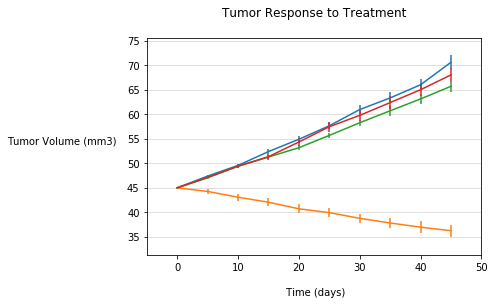

In [347]:
# Generate the plot with error bars
drugs_legend=[]
for drug in df['Drug'].unique():
    drug_data = df_tumor_volume.loc[drug].reset_index()
    x_axis = drug_data.loc[:,'Timepoint'].values 
    y_axis = drug_data.loc[:,'Tumor Volume (mm3)'].values 
    std_err = drug_data.loc[:,'Tumor Vol Sem'].values 
    plt.errorbar(x_axis,y_axis,yerr=std_err)
   
    #for each drug, specify color
    
    #for each drug, identify for legend
    drugs_legend.append(drug)

#print(drugs_legend)
plt.title('Tumor Response to Treatment\n',weight='medium')
plt.xlabel('\n Time (days)')
plt.ylabel('Tumor Volume (mm3)  ',rotation=0,ha='right')
plt.xlim(min(x_axis)-5,max(x_axis)+5)
plt.ylim(min(df_tumor_volume['Tumor Volume (mm3)'])-5,max(df_tumor_volume['Tumor Volume (mm3)'])+5)
plt.grid(axis='y',alpha=.5)
#get rid of outline?
#rotate y axis label? 

#plt.legend(loc='best')

#fig, ax = plt.subplots()
#plt.figure(figsize=(20,10))

#frameon=False
#fig, ax = plt()
#for item in [fig, ax]:
    #item.patch.set_visible(False)


In [301]:
#x_axis = np.arange(0, len(df['Timepoint']), 1)
#means = [np.mean() for s in df]
#standard_errors = [sem(s) for s in samples]

# # Setting up the plot
#fig, ax = plt.subplots()
#ax.errorbar(x_data, y_data, std_err, fmt="o")
# ax.set_xlim(-1, len(samples) + 1)
# ax.set_xlabel("Sample Number")
# ax.set_ylabel("Proportion of People Voting Republican")

# Save the Figure

  #print(data)
    #plt.plot(x_axis,y_axis,std_err)
    #fig, ax = plt.plot()
    #ax.errorbar(x_axis, y_axis, fmt="o")

In [283]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)